
##Install Java, Spark, and Findspark

Java 8, Apache Spark 2.2.1, FindSpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [0]:
!java -version

openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


In [0]:
!wget --no-cookies --no-check-certificate 'https://archive.apache.org/dist/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz'

--2019-05-17 18:02:37--  https://archive.apache.org/dist/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 163.172.17.199
Connecting to archive.apache.org (archive.apache.org)|163.172.17.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200934340 (192M) [application/x-gzip]
Saving to: ‘spark-2.2.1-bin-hadoop2.7.tgz.2’

spark-2.2.1-bin-had 100%[===================>] 191.62M  20.3MB/s    in 10s     

2019-05-17 18:02:48 (18.3 MB/s) - ‘spark-2.2.1-bin-hadoop2.7.tgz.2’ saved [200934340/200934340]



In [0]:
!ls -l

total 589500
-rw-r--r--  1 root root    822526 May 17 16:14 CleanDataset.csv
drwxr-xr-x  1 root root      4096 May 15 16:23 sample_data
drwxrwxr-x 12 1001 1001      4096 Nov 24  2017 spark-2.2.1-bin-hadoop2.7
-rw-r--r--  1 root root 200934340 Nov 25  2017 spark-2.2.1-bin-hadoop2.7.tgz
-rw-r--r--  1 root root 200934340 Nov 25  2017 spark-2.2.1-bin-hadoop2.7.tgz.1
-rw-r--r--  1 root root 200934340 Nov 25  2017 spark-2.2.1-bin-hadoop2.7.tgz.2
drwxr-xr-x  2 root root      4096 May 17 16:14 spark-warehouse


In [0]:
!rm -r spark-2.3.1-bin-hadoop2.7.tgz

rm: cannot remove 'spark-2.3.1-bin-hadoop2.7.tgz': No such file or directory


In [0]:
!rm -r spark-2.3.1-bin-hadoop2.7.tgz.1

rm: cannot remove 'spark-2.3.1-bin-hadoop2.7.tgz.1': No such file or directory


In [0]:
!tar xf  spark-2.2.1-bin-hadoop2.7.tgz

In [0]:
!ls

CleanDataset.csv	   spark-2.2.1-bin-hadoop2.7.tgz    spark-warehouse
sample_data		   spark-2.2.1-bin-hadoop2.7.tgz.1
spark-2.2.1-bin-hadoop2.7  spark-2.2.1-bin-hadoop2.7.tgz.2


In [0]:
!which gzip
!gzip -V

/bin/gzip
gzip 1.6
Copyright (C) 2007, 2010, 2011 Free Software Foundation, Inc.
Copyright (C) 1993 Jean-loup Gailly.
This is free software.  You may redistribute copies of it under the terms of
the GNU General Public License <http://www.gnu.org/licenses/gpl.html>.
There is NO WARRANTY, to the extent permitted by law.

Written by Jean-loup Gailly.


In [0]:
!pip install -q findspark

# Set Environment Variables
Setting the locations where Spark and Java are installed.

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.2.1-bin-hadoop2.7"

# Starting a SparkSession
This will start a local Spark session.

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Creating And Displaying A Sample Dataframe

In [0]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(30)

/content/spark-2.2.1-bin-hadoop2.7/python/pyspark/sql/session.py:336: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
+-----+
only showing top 30 rows



# Flint

In [0]:
!conda create -n flint python=3.5 pandas

/bin/bash: conda: command not found


In [0]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from pyspark import SparkContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

%matplotlib inline


In [0]:
#Loading the dataset
df = spark.read.csv(r'CleanDataset.csv', header=True) # requires spark 2.0
df.show()
df.describe()
Features_col = ['Ds_avg','S_avg','Ws_avg','Ot_avg']

+---------+---------+----------+----------+
|    S_avg|   Ds_avg|    Ws_avg|    Ot_avg|
+---------+---------+----------+----------+
|3.0899999|    88.18|       1.9| 5.3000002|
|1.8099999|    23.01|       0.2| 4.8899999|
|     1.89|38.110001|0.18000001| 4.8000002|
|   177.53|   1181.7|      5.04|      1.79|
|191.96001|  1200.48| 5.3099999|0.85000002|
|2.8900001|159.92999| 3.1500001|      6.73|
|  1259.62|  1800.15|         9| 4.6900001|
|95.709999|  1042.71| 4.5300002|     10.66|
|   921.19|   1781.9|      7.79| 5.8600001|
|805.09998|  1781.65| 7.6399999| 6.9299998|
|572.60999|1660.5601| 6.7199998| 7.1199999|
|   137.25|  1114.23| 4.9899998| 6.2600002|
|   143.42|1121.8199| 5.0100002| 6.6399999|
|162.32001|  1155.42| 4.6500001| 7.2199998|
|   129.45|  1086.96|      4.77| 6.4400001|
|2.1400001|     1.95|       0.1| 5.8800001|
|   144.64|  1130.66| 5.1999998| 8.2600002|
|76.980003|997.72998|      4.54| 6.4099998|
|129.35001|  1097.42| 4.9699998| 7.9699998|
|   172.92|   1177.1| 5.4899998|

In [0]:
# Converting all data columns to float
df_feat = df.select(*(df[c].cast("float").alias(c) for c in df.columns[0:]))
df_feat.show()
df_feat.describe()


+-------+-------+------+------+
|  S_avg| Ds_avg|Ws_avg|Ot_avg|
+-------+-------+------+------+
|   3.09|  88.18|   1.9|   5.3|
|   1.81|  23.01|   0.2|  4.89|
|   1.89|  38.11|  0.18|   4.8|
| 177.53| 1181.7|  5.04|  1.79|
| 191.96|1200.48|  5.31|  0.85|
|   2.89| 159.93|  3.15|  6.73|
|1259.62|1800.15|   9.0|  4.69|
|  95.71|1042.71|  4.53| 10.66|
| 921.19| 1781.9|  7.79|  5.86|
|  805.1|1781.65|  7.64|  6.93|
| 572.61|1660.56|  6.72|  7.12|
| 137.25|1114.23|  4.99|  6.26|
| 143.42|1121.82|  5.01|  6.64|
| 162.32|1155.42|  4.65|  7.22|
| 129.45|1086.96|  4.77|  6.44|
|   2.14|   1.95|   0.1|  5.88|
| 144.64|1130.66|   5.2|  8.26|
|  76.98| 997.73|  4.54|  6.41|
| 129.35|1097.42|  4.97|  7.97|
| 172.92| 1177.1|  5.49|  6.15|
+-------+-------+------+------+
only showing top 20 rows



DataFrame[summary: string, S_avg: string, Ds_avg: string, Ws_avg: string, Ot_avg: string]

In [0]:
# Function Converting all data columns to float

for col in df.columns:
    if col in Features_col:
        df = df.withColumn(col,df[col].cast('float'))
df.show()
df.describe()

+-------+-------+------+------+
|  S_avg| Ds_avg|Ws_avg|Ot_avg|
+-------+-------+------+------+
|   3.09|  88.18|   1.9|   5.3|
|   1.81|  23.01|   0.2|  4.89|
|   1.89|  38.11|  0.18|   4.8|
| 177.53| 1181.7|  5.04|  1.79|
| 191.96|1200.48|  5.31|  0.85|
|   2.89| 159.93|  3.15|  6.73|
|1259.62|1800.15|   9.0|  4.69|
|  95.71|1042.71|  4.53| 10.66|
| 921.19| 1781.9|  7.79|  5.86|
|  805.1|1781.65|  7.64|  6.93|
| 572.61|1660.56|  6.72|  7.12|
| 137.25|1114.23|  4.99|  6.26|
| 143.42|1121.82|  5.01|  6.64|
| 162.32|1155.42|  4.65|  7.22|
| 129.45|1086.96|  4.77|  6.44|
|   2.14|   1.95|   0.1|  5.88|
| 144.64|1130.66|   5.2|  8.26|
|  76.98| 997.73|  4.54|  6.41|
| 129.35|1097.42|  4.97|  7.97|
| 172.92| 1177.1|  5.49|  6.15|
+-------+-------+------+------+
only showing top 20 rows



DataFrame[summary: string, S_avg: string, Ds_avg: string, Ws_avg: string, Ot_avg: string]

In [0]:
# Creating a features column to be used in the clustering
vecAssembler = VectorAssembler(inputCols=Features_col, outputCol="features")
df_kmeans = vecAssembler.transform(df).select('Ds_avg', 'features')
df_kmeans.show()

+-------+--------------------+
| Ds_avg|            features|
+-------+--------------------+
|  88.18|[88.1800003051757...|
|  23.01|[23.0100002288818...|
|  38.11|[38.1100006103515...|
| 1181.7|[1181.69995117187...|
|1200.48|[1200.47998046875...|
| 159.93|[159.929992675781...|
|1800.15|[1800.15002441406...|
|1042.71|[1042.7099609375,...|
| 1781.9|[1781.90002441406...|
|1781.65|[1781.65002441406...|
|1660.56|[1660.56005859375...|
|1114.23|[1114.22998046875...|
|1121.82|[1121.81994628906...|
|1155.42|[1155.42004394531...|
|1086.96|[1086.9599609375,...|
|   1.95|[1.95000004768371...|
|1130.66|[1130.66003417968...|
| 997.73|[997.72998046875,...|
|1097.42|[1097.42004394531...|
| 1177.1|[1177.09997558593...|
+-------+--------------------+
only showing top 20 rows



In [0]:
# optimizing choice of k
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans) # requires Spark 2.0 or later

In [0]:
# k means clustering model 

k = 10
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)


Cluster Centers: 
[1001.58271687   68.15514263    4.19587211   11.28453571]
[1572.49015929  488.63953048    6.59988266    9.5923997 ]
[59.62128079  2.05727499  2.3805959  10.73574177]
[1797.43409429 1809.00570586   12.38754294    7.78791281]
[1779.8475877  1027.50398627    8.62751602    8.44792882]
[1722.73870725  710.5863718     7.36983832    9.03058488]
[1793.93163358 1395.15602772   10.11822897    7.73254403]
[1198.52400837  184.90426225    5.33411593   11.18812018]
[1393.75512761  320.89631826    5.98211776   10.26547958]
[526.13452429  26.88397517   3.61768552  14.76803886]


In [0]:
# Assigning clusters to events
transformed = model.transform(df_kmeans).select('Ds_avg', 'prediction')
rows = transformed.collect()
print(rows[:3])

[Row(Ds_avg=88.18000030517578, prediction=2), Row(Ds_avg=23.010000228881836, prediction=2), Row(Ds_avg=38.11000061035156, prediction=2)]


In [0]:
df_pred = spark.createDataFrame(rows)
df_pred.show()

+------------------+----------+
|            Ds_avg|prediction|
+------------------+----------+
| 88.18000030517578|         2|
|23.010000228881836|         2|
| 38.11000061035156|         2|
| 1181.699951171875|         7|
|  1200.47998046875|         7|
|159.92999267578125|         2|
|1800.1500244140625|         6|
|   1042.7099609375|         0|
|1781.9000244140625|         4|
|1781.6500244140625|         5|
|  1660.56005859375|         1|
|  1114.22998046875|         7|
|1121.8199462890625|         7|
|1155.4200439453125|         7|
|   1086.9599609375|         0|
|1.9500000476837158|         2|
|1130.6600341796875|         7|
|   997.72998046875|         0|
|1097.4200439453125|         0|
|1177.0999755859375|         7|
+------------------+----------+
only showing top 20 rows



In [0]:
#Joining the prediction with the original data

df_pred = df_pred.join(df, 'Ds_avg')
df_pred.show()

+------------------+----------+-------+------+------+
|            Ds_avg|prediction|  S_avg|Ws_avg|Ot_avg|
+------------------+----------+-------+------+------+
| 88.18000030517578|         2|   3.09|   1.9|   5.3|
|23.010000228881836|         2|   1.81|   0.2|  4.89|
| 38.11000061035156|         2|   1.89|  0.18|   4.8|
| 1181.699951171875|         7| 177.53|  5.04|  1.79|
|  1200.47998046875|         7| 191.96|  5.31|  0.85|
|159.92999267578125|         2|   2.89|  3.15|  6.73|
|1800.1500244140625|         6| 953.77|  7.72| 14.88|
|1800.1500244140625|         6|1126.14|  8.78| 20.15|
|1800.1500244140625|         6|1259.62|   9.0|  4.69|
|   1042.7099609375|         0|  95.71|  4.53| 10.66|
|1781.9000244140625|         4|1127.63|  9.25|  6.37|
|1781.9000244140625|         4| 921.19|  7.79|  5.86|
|1781.6500244140625|         5| 1099.3|  9.29|  9.86|
|1781.6500244140625|         5|  805.1|  7.64|  6.93|
|  1660.56005859375|         1| 572.61|  6.72|  7.12|
|  1114.22998046875|        

In [0]:
# Converting to Pandas Dataframe
pddf_pred = df_pred.toPandas()
pddf_pred.head()

pddf_pred.describe()

,Ds_avg,prediction,S_avg,Ws_avg,Ot_avg
count,727905.000000,727905.000000,727905.000000,727905.000000,727905.000000
mean,155.454692,1.898047,31.620300,1.791740,10.748722
std,400.887585,0.962078,178.565516,2.231659,7.200606
min,-0.090000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.330000,0.000000,5.200000
50%,0.000000,2.000000,1.150000,0.980000,9.500000
75%,0.000000,2.000000,2.180000,3.180000,15.190000
max,1803.369995,9.000000,2056.649902,20.670000,68.699997


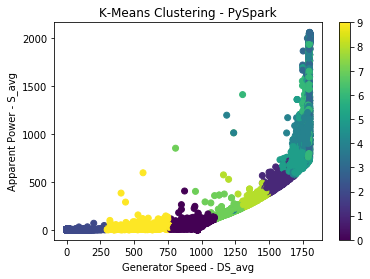

In [0]:
# Visualization of the results
# Ds_avg vs S_avg

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('K-Means Clustering - PySpark')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Apparent Power - S_avg')
scatter=ax.scatter(pddf_pred.Ds_avg, pddf_pred.S_avg, c=pddf_pred.prediction)
plt.colorbar(scatter)


In [0]:
# Ds_avg vs Ws_avg

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('K-Means Clustering - PySpark')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Apparent Power - Ws_avg')
scatter=ax.scatter(pddf_pred.Ds_avg, pddf_pred.Ws_avg, c=pddf_pred.prediction)
plt.colorbar(scatter)

In [0]:
# Ds_avg vs Ot_avg

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('K-Means Clustering - PySpark')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Apparent Power - Ot_avg')
scatter=ax.scatter(pddf_pred.Ds_avg, pddf_pred.Ot_avg, c=pddf_pred.prediction)
plt.colorbar(scatter)